<h1>Softmax</h1>
<h2>Dado a matriz:</h2>

\begin{equation}
\begin{bmatrix}
1 & 2 & 3 \\
4 & 5 & 6
\end{bmatrix}
\end{equation}

<h2>Aplicando a formula:</h2>



\begin{equation}
\text{softmax}(x_i) = \frac{e^{x_i}}{\sum_{j=1}^{n} e^{x_j}}
\end{equation}

<h2>Obtemos: </h2>
\begin{equation}
\text{softmax}([1, 2, 3]) = \left[ \frac{e^{1}}{e^{1} + e^{2} + e^{3}}, \frac{e^{2}}{e^{1} + e^{2} + e^{3}}, \frac{e^{3}}{e^{1} + e^{2} + e^{3}} \right]
\end{equation}

\begin{equation}
\text{softmax}([4, 5, 6]) = \left[ \frac{e^{4}}{e^{4} + e^{5} + e^{6}}, \frac{e^{5}}{e^{4} + e^{5} + e^{6}}, \frac{e^{6}}{e^{4} + e^{5} + e^{6}} \right]
\end{equation}

\begin{equation}
\text{softmax}([1, 2, 3]) \approx \left[ 0.09003057, 0.24472848, 0.6652409 \right]
\end{equation}

\begin{equation}
\text{softmax}([4, 5, 6]) \approx \left[ 0.09003057, 0.24472848, 0.6652409 \right]
\end{equation}




In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
x = tf.constant([[1.,2.,3.],[4.,5.,6.]])
tf.nn.softmax(x, axis=-1)

# como pode ver o mesmo resultado de acima

<tf.Tensor: shape=(2, 3), dtype=float32, numpy=
array([[0.09003057, 0.24472848, 0.66524094],
       [0.09003057, 0.24472848, 0.66524094]], dtype=float32)>

In [2]:
# Para saber se está usando a GPU
if tf.config.list_physical_devices('GPU'):
  print("TensorFlow **IS** using the GPU")
else:
  print("TensorFlow **IS NOT** using the GPU")

TensorFlow **IS NOT** using the GPU


In [3]:
# Gradiente

x = tf.Variable(1.0)

def f(x):
    y = x**2 + 2*x - 5
    return y
with tf.GradientTape() as tape:
    y = f(x)

g_x = tape.gradient(y,x) # g(x) = dy / dx

g_x # y' = 2x + 2

<tf.Tensor: shape=(), dtype=float32, numpy=4.0>

Este exemplo simplificado leva apenas a derivada em relação a um único escalar ( x ), mas o TensorFlow pode calcular o gradiente em relação a qualquer número de tensores não escalares simultaneamente.

<h1>Loops De Treinamento Básico</h1>
<p>Dado x e y tente encontrar a inclinação e o deslocamento de uma linha por meio de regressão linear simples</p>

Começando ...
    W = 5.00, b = 0.00, loss=10.60855
Epoca:  0
    W = 4.46, b = 0.41, loss=10.60855
Epoca:  1
    W = 4.06, b = 0.75, loss=10.60855
Epoca:  2
    W = 3.77, b = 1.01, loss=10.60855
Epoca:  3
    W = 3.56, b = 1.22, loss=10.60855
Epoca:  4
    W = 3.41, b = 1.39, loss=10.60855
Epoca:  5
    W = 3.29, b = 1.53, loss=10.60855
Epoca:  6
    W = 3.21, b = 1.64, loss=10.60855
Epoca:  7
    W = 3.15, b = 1.73, loss=10.60855
Epoca:  8
    W = 3.11, b = 1.80, loss=10.60855
Epoca:  9
    W = 3.08, b = 1.85, loss=10.60855


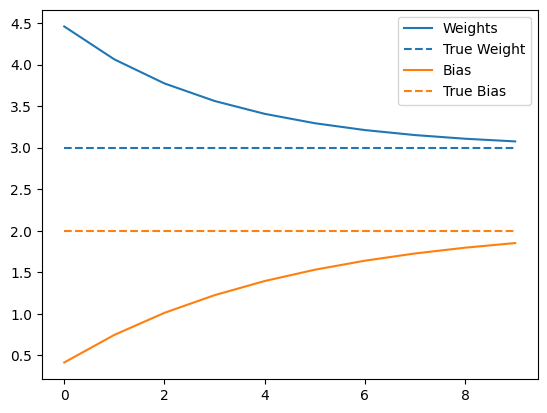

In [4]:
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
# f(x) = x * w + b

TRUE_W = 3.0
TRUE_B = 2.0

NUM_EXAMPLES = 201

# Fazendo um vetor de valores aletorios

x = tf.linspace(-2,2,NUM_EXAMPLES)
x = tf.cast(x, tf.float32)

def f(x):
    return x * TRUE_W + TRUE_B

# Gerando algum ruído Gaussiano
noise = tf.random.normal(shape=[NUM_EXAMPLES])

# Calculando y

y = f(x) + noise

#Plota
#plt.plot(x,y,'.')
#plt.show()

# Definindo o Modelo

class MeuModelo(tf.Module):
    def __init__(self,**kwargs):
        super().__init__(**kwargs)
        # Inicia o peso (w) c/ 5 e o bias (b) como 0
        self.w = tf.Variable(5.0)
        self.b = tf.Variable(0.0)
    def __call__(self,x):
        return self.w * x + self.b # Ao Final Retorna f(x)

#print('Variáveis:', model.variables) # mostra o w e b

#assert model(3.0).numpy() == 15 # 3.0 x 5.0 # gera um AssertionError se False

# Definindo uma Função de Perda
# Defina a perda L2 padrão, também conhecida como erro "mean squared":

def perda(target_y, predicted_y):
    return tf.reduce_mean(tf.square(target_y - predicted_y)) # Faz O Quadrado do Erro

#Plotando as previsões do modelo em vermelho e os dados de treinamento em azul:
#plt.plot(x, y, '.', label="Data")
#plt.plot(x, f(x), label="Reta Correta")
#plt.plot(x, model(x), label="Reta Prevista")
#plt.legend()
#plt.show()
#print("Perda: %1.6f" % perda(y, model(x)).numpy())

# Definindo Um Loop de Treinamento

# Ou seja, agora treinaremos o algoritmo por meio do Gradiente Descendente


def train(model, x, y, learning_rate):
    with tf.GradientTape() as t:
        # As variáveis treinadas são automaticamente procuradas pelo GradientTape
        current_loss = perda(y,model(x))

    # Usa o GradientTape pra calcular os gradientes c/ base no w e b
    dw, db = t.gradient(current_loss, [model.w,model.b])

    # Subtrai os Gradientes pra ter a learning rate
    model.w.assign_sub(learning_rate * dw) # atualiza w pra learning_rate * dw
    model.b.assign_sub(learning_rate * db) # atualiza b pra learning_rate * db

model = MeuModelo()

# coleciona os valores de w e b pra plotar posteriormente
weights = [] # w
biases = [] # b
epochs = range(10)

# Define um Loop De Treinamento

def report(model, loss):
    return f"W = {model.w.numpy():1.2f}, b = {model.b.numpy():1.2f}, loss={current_loss:2.5f}"

def training_loop(model,x,y):

    for epoch in epochs:
        # atualiza o modelo de acordo com a função definida anteriormente
        train(model,x,y,learning_rate=0.1)
        # w e b se tornam o learning rate * w/b

        # Guarda os valores pra usar depois
        weights.append(model.w.numpy())
        biases.append(model.b.numpy())
        current_loss = perda(y,model(x))

        print(f'Epoca: {epoch:2d}')
        print("   ", report(model,current_loss))

current_loss = perda(y,model(x))

print('Começando ...')
print("   ", report(model,current_loss))

training_loop(model,x,y)

# Plotando a Evolução dos pesos ao longo do tempo:

plt.plot(epochs,weights,label='Weights',color = colors[0])
plt.plot(epochs, [TRUE_W] * len(epochs), '--', label = 'True Weight', color=colors[0])

plt.plot(epochs,biases,label='Bias',color = colors[1])
plt.plot(epochs, [TRUE_B] * len(epochs), '--', label = 'True Bias', color=colors[1])

plt.legend()
plt.show()


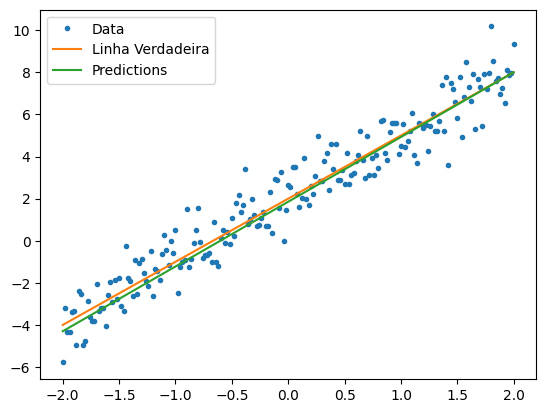

Current loss: 0.911354


In [5]:
plt.plot(x, y, '.', label="Data")
plt.plot(x, f(x), label="Linha Verdadeira")
plt.plot(x, model(x), label="Predictions")
plt.legend()
plt.show()

print("Current loss: %1.6f" % perda(model(x), y).numpy())

<h1>Agora Faremos a Mesma Solução, Mas com Keras!</h1>

In [15]:
class MeuModeloKeras(tf.keras.Model):
    def __init__(self,**kwargs):
        super().__init__(**kwargs)
        # inicia o peso com 5 e o bias como 0
        self.w = tf.Variable(5.0)
        self.b = tf.Variable(0.0)
    def call(self,x):
        return self.w * x + self.b # return f(x) = wx + b

keras_model = MeuModeloKeras()

# Reusa o Loop de Treino com o Modelo Keras

training_loop(keras_model, x, y)

# voce tambem pode salvar um checkpoint usando uma função do Keras
keras_model.save_weights('my_checkpoint.weights.h5')

# Em vez de escrever novos Loops de treinamento pra cada modelo,
#voce pode usar um recurso interno do Keras como atalho,
# Para isso, voce precisará usar model.compile() p/ definir os parametros
# E model.fit() para treinar

keras_model.compile(

    run_eagerly=False,
                                  #.adam
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.1),

    # Keras vem com a função de Calculo do Erro Médio Quadratico
    # Porem voce pode definir outra função de perda como keras.losses.mean_absolute_error
    loss = tf.keras.losses.MeanAbsoluteError(),
    # Loss também pode ser SparseCategoricalCrossentropy
    # Ou MeanSquaredError
)

# Keras Fit espera dados em um lote, ou conjunto de dados como um array Numpy,
# Como nossa funçaõ de treino está programada pra fazer 1 só lote, temos que passar
# O batch_size como 1000

keras_model.fit(x,y,epochs=10,batch_size=1000)

Epoca:  0
    W = 4.46, b = 0.41, loss=10.60855
Epoca:  1
    W = 4.06, b = 0.75, loss=10.60855
Epoca:  2
    W = 3.77, b = 1.01, loss=10.60855
Epoca:  3
    W = 3.56, b = 1.22, loss=10.60855
Epoca:  4
    W = 3.41, b = 1.39, loss=10.60855
Epoca:  5
    W = 3.29, b = 1.53, loss=10.60855
Epoca:  6
    W = 3.21, b = 1.64, loss=10.60855
Epoca:  7
    W = 3.15, b = 1.73, loss=10.60855
Epoca:  8
    W = 3.11, b = 1.80, loss=10.60855
Epoca:  9
    W = 3.08, b = 1.85, loss=10.60855
Epoch 1/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/step - loss: 0.7467
Epoch 2/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 0.7467
Epoch 3/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.7467
Epoch 4/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - loss: 0.7467
Epoch 5/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 0.7467
Epoch 6/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - loss: 0.7467
Epoch 7/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - loss: 0.7467
Epoch 8/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.7467
Epoch 9

<h2>Extra: Avalia o Modelo</h2>


In [16]:
loss = keras_model.evaluate(x,y)
print("Loss:", loss)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7398 
Loss: 0.7467453479766846


<h1>OverFiting</h1>

<p> Quando, no modelo a acurácia é de 90%, mas quando usamos model.evaluate() e retorna uma porcentagem menor</p>
<p> Isso quer dizer que: Nosso modelo tem épocas demais, ele decorou os dados passados e por isso ele acerta</p>
<p> Então caso haja OverFiting, manipule as epocas, de uma olhada nos modelos de otimização, de ativação</p>